# Logistic Regression of Famous Penguins Data Set

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
penguins = pd.read_csv("penguins.csv")
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# EDA 

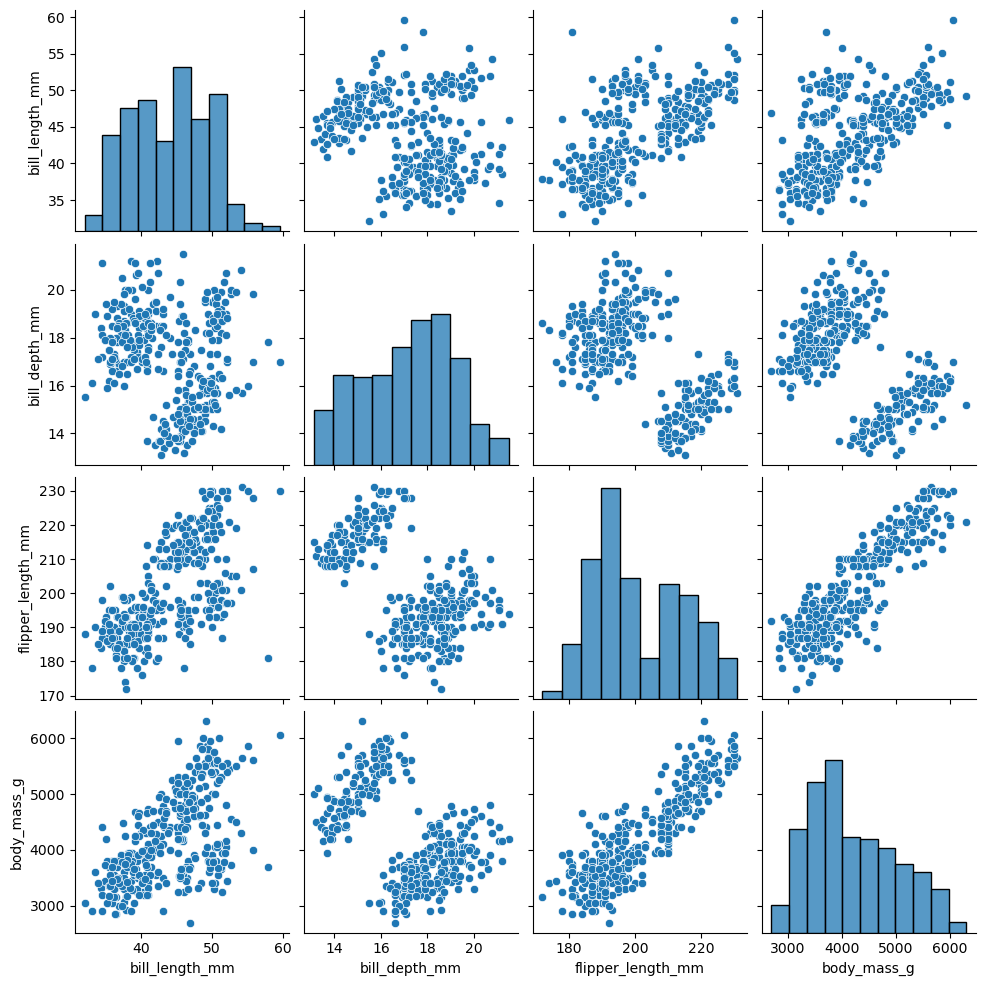

In [20]:
sns.pairplot(penguins)

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

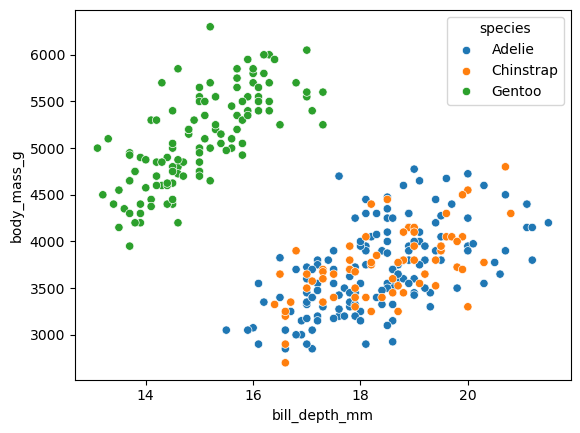

In [24]:
sns.scatterplot(penguins, x='bill_depth_mm', y='body_mass_g',hue='species')

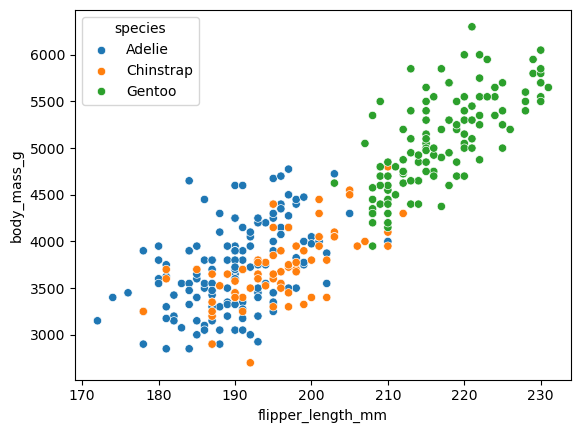

In [26]:
ax = sns.scatterplot(penguins, x="flipper_length_mm",y="body_mass_g",hue="species")

The flipper length seems to be a good indicator for distinguishing Gentoo penguins from the others.

In [29]:
penguins['isGentoo'] = penguins['species'] == 'Gentoo'

<Axes: xlabel='isGentoo', ylabel='flipper_length_mm'>

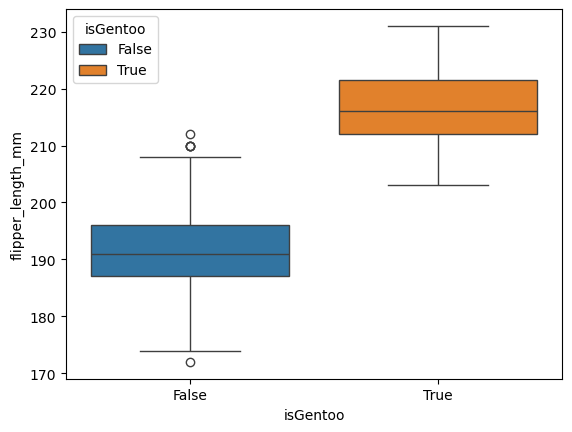

In [42]:
sns.boxplot(penguins, y= "flipper_length_mm", x = "isGentoo",hue="isGentoo")

In [46]:
penguins['isGentoo'] = penguins['isGentoo'].astype('int')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,isGentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


We will do the binary classification based on whetere the penguins is Gentoo or not 
--> So we converted our new column into numbers:

* 1 for Gentoos
* 0 else

# The Model 

In [53]:
from sklearn.model_selection import train_test_split

In [65]:
X = penguins[['flipper_length_mm']]
y = penguins['isGentoo']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [120]:
prediction = model.predict(X_test)

In [83]:
import math 

In [85]:
slope = model.coef_[0]
intercept = model.intercept_

X_range = pd.Series(range(170,240))

In [87]:
intercept

array([-107.53909998])

In [113]:
y_range = 1/(1+math.e**-(slope* X_range + intercept))
y_range.index=X_range
y_range 

#Sigmoid Function

170    4.652703e-09
171    7.823824e-09
172    1.315627e-08
173    2.212313e-08
174    3.720150e-08
           ...     
235    9.999995e-01
236    9.999997e-01
237    9.999998e-01
238    9.999999e-01
239    9.999999e-01
Length: 70, dtype: float64

In [95]:
X_df = pd.DataFrame(X_range)
predictions = model.predict(X_df)
predictions

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [99]:
X_df = pd.DataFrame(X_range)
probabilities = model.predict_proba(X_df)[:,1]
probabilities

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4.65270256e-09, 7.82382397e-09, 1.31562722e-08, 2.21231329e-08,
       3.72014960e-08, 6.25567498e-08, 1.05193266e-07, 1.76889352e-07,
       2.97450992e-07, 5.00183217e-07, 8.41090543e-07, 1.41434801e-06,
       2.37831649e-06, 3.99928842e-06, 6.72504700e-06, 1.13085550e-05,
       1.90159292e-05, 3.19761155e-05, 5.37687601e-05, 9.04123774e-05,
       1.52024964e-04, 2.55613446e-04, 4.29755875e-04, 7.22451032e-04,
       1.21425082e-03, 2.04015384e-03, 3.42588858e-03, 5.74743588e-03,
       9.62697844e-03, 1.60828682e-02, 2.67511623e-02, 4.41783419e-02,
       7.21172917e-02, 1.15588468e-01, 1.80175176e-01, 2.69839720e-01,
       3.83265485e-01, 5.11001840e-01, 6.37317382e-01, 7.47149113e-01,
       8.32463764e-01, 8.93110548e-01, 9.33555935e-01, 9.59393206e-01,
       9.75447695e-01, 9.85252378e-01, 9.91177087e-01, 9.94734325e-01,
       9.96861890e-01, 9.98131440e-01, 9.98887955e-01, 9.99338386e-01,
       9.99606444e-01, 9.99765921e-01, 9.99860784e-01, 9.99917206e-01,
      

In [103]:
model.predict_proba(X_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.99999995e-01, 4.65270256e-09],
       [9.99999992e-01, 7.82382397e-09],
       [9.99999987e-01, 1.31562722e-08],
       [9.99999978e-01, 2.21231329e-08],
       [9.99999963e-01, 3.72014960e-08],
       [9.99999937e-01, 6.25567498e-08],
       [9.99999895e-01, 1.05193266e-07],
       [9.99999823e-01, 1.76889352e-07],
       [9.99999703e-01, 2.97450992e-07],
       [9.99999500e-01, 5.00183217e-07],
       [9.99999159e-01, 8.41090543e-07],
       [9.99998586e-01, 1.41434801e-06],
       [9.99997622e-01, 2.37831649e-06],
       [9.99996001e-01, 3.99928842e-06],
       [9.99993275e-01, 6.72504700e-06],
       [9.99988691e-01, 1.13085550e-05],
       [9.99980984e-01, 1.90159292e-05],
       [9.99968024e-01, 3.19761155e-05],
       [9.99946231e-01, 5.37687601e-05],
       [9.99909588e-01, 9.04123774e-05],
       [9.99847975e-01, 1.52024964e-04],
       [9.99744387e-01, 2.55613446e-04],
       [9.99570244e-01, 4.29755875e-04],
       [9.99277549e-01, 7.22451032e-04],
       [9.987857

In [107]:
model.predict(pd.DataFrame([213]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [111]:
model.predict(pd.DataFrame([207]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# Evaluation

In [116]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.97      1.00      0.99        38

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

